In [1]:
import os
try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'read_nums_datasets',
        root = '..',
        default_wildcards={'sample': 'WTC11'}
    )

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks")

In [3]:
df_lrgasp = snakemake.params['df_lrgasp'].set_index('file_acc')

In [4]:
rows = list()

In [5]:
for i in snakemake.input['long_fastq']:
    file_acc = Path(i).stem.split('_')[0]
    row = df_lrgasp.loc[file_acc]
    rows.append({
        'data source': f"{row['platform']}\n{row['library_prep']}",
        'count': int(open(i).read()),
        'read': 'total reads'
    })

for i in snakemake.input['long_bam']:
    file_acc = Path(i).stem.split('_')[0]
    row = df_lrgasp.loc[file_acc]
    rows.append({
        'data source': f"{row['platform']}\n{row['library_prep']}",
        'count': int(open(i).read()),
        'read': 'polyA usable reads'
    })

In [6]:
for i in snakemake.input['short_fastq']:
    rows.append({
        'data source': "Illumina\nRNA-seq",
        'count': int(open(i).read()),
        'read': 'total reads'
    })

for i in snakemake.input['short_bam']:
    rows.append({
        'data source': "Illumina\nRNA-seq",
        'count': int(open(i).read()),
        'read': 'polyA usable reads'
    })

In [7]:
for i in snakemake.input['quantseq_fastq']:
    rows.append({
        'data source': "Quantseq",
        'count': int(open(i).read()),
        'read': 'total reads'
    })

for i in snakemake.input['quantseq_bam']:
    rows.append({
        'data source': "Quantseq",
        'count': int(open(i).read()),
        'read': 'polyA usable reads'
    })

In [8]:
df = pd.DataFrame(rows).sort_values(['data source', 'read'], ascending=False)

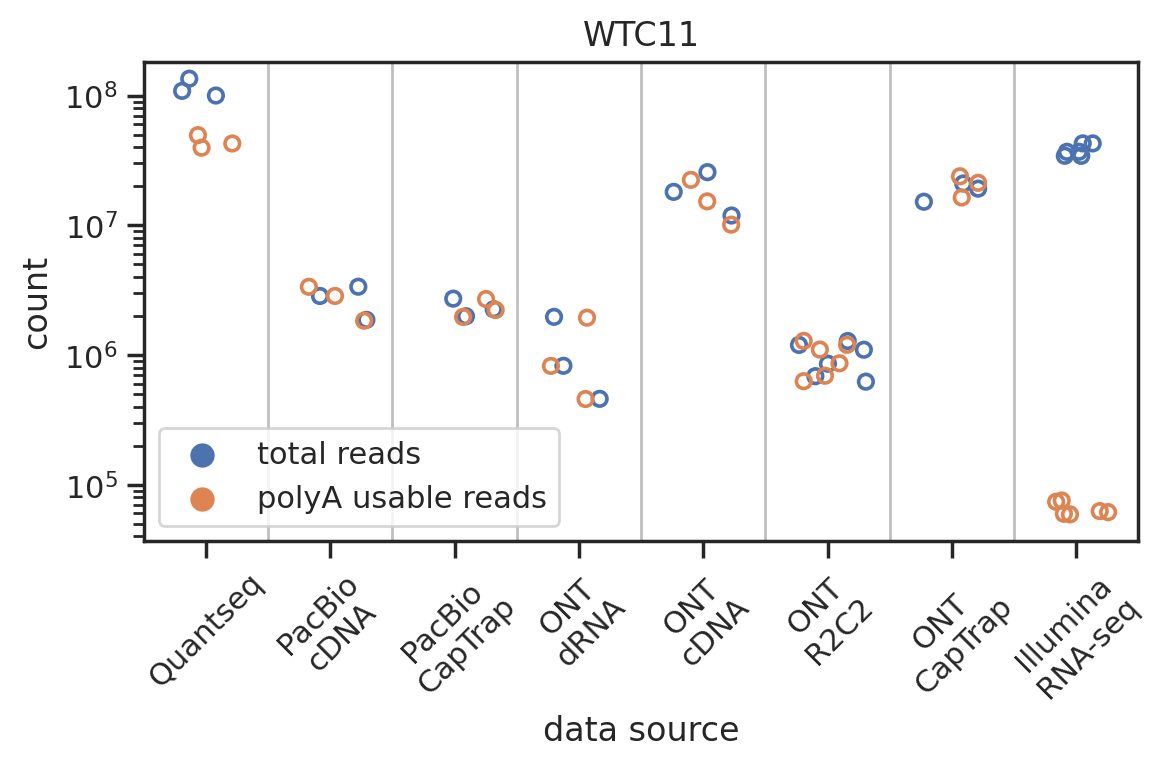

In [9]:
plt.figure(figsize=(6, 4), dpi=200)
plt.title('WTC11')
ax = sns.stripplot(x='data source', y="count", hue="read",
                   data=df, s=10, marker="$\circ$", jitter=0.3)
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='')

for i in range(len(set(df['data source'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1, alpha=0.5)

plt.tight_layout()
plt.savefig(snakemake.output['read_nums'], bbox_inches = "tight")